#### Problem Statement

You have been as a data analyst for a supermarket. The supermarket has 3 branches located in the 3 major cities in Nigeria and they have been gathering data for the past 3 months on purchases made in their locations. The company is interested in understanding how the business is faring and whats to identify areas of improvements/risks.

#### Objectives

- Get the sales data for each branch

- Examine and Profile the data

- Prepare for visualization

- Draw conclusions and recommendation

Best Practice for data analysis/science - CRISP-DM framework (Cross Industry Standard Process for Data Mining)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # data viz library
import seaborn as sb # data viz library

In [3]:
lagos_df = pd.read_csv('datasource/Lagos_Branch.csv', sep=',')
abuja_df = pd.read_csv('datasource/Abuja_Branch.csv')
ph_df = pd.read_csv('datasource/Port_Harcourt_Branch.csv')

In [4]:
## reading excel files

# lagos_df = pd.read_excel('datasource/Lagos_Branch.xlxs')
# abuja_df = pd.read_excel('datasource/Abuja_Branch.xlxs')
# ph_df = pd.read_excel('datasource/Port_Harcourt_Branch.xlxs')

#### Data Profiling

In [5]:
lagos_df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,3/3/2019,13:23,Card,116751.6,4.761905,5837.58,7.4
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,1/27/2019,20:33,Epay,167673.6,4.761905,8383.68,8.4
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2/8/2019,10:37,Epay,217501.2,4.761905,10875.06,5.3
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2/25/2019,14:36,Epay,148694.4,4.761905,7434.72,5.8
5,665-32-9167,A,Lagos,Member,Female,Health and beauty,13053.6,2,1305.36,27412.56,1/10/2019,17:15,Card,26107.2,4.761905,1305.36,7.2
6,365-64-0515,A,Lagos,Normal,Female,Electronic accessories,16902.0,5,4225.50,88735.50,2/12/2019,10:25,Epay,84510.0,4.761905,4225.50,7.1
7,252-56-2699,A,Lagos,Normal,Male,Food and beverages,15548.4,10,7774.20,163258.20,2/7/2019,16:48,Epay,155484.0,4.761905,7774.20,8.2
8,829-34-3910,A,Lagos,Normal,Female,Health and beauty,25696.8,10,12848.40,269816.40,3/29/2019,19:21,Cash,256968.0,4.761905,12848.40,5.7
9,656-95-9349,A,Lagos,Member,Female,Health and beauty,24814.8,7,8685.18,182388.78,3/11/2019,11:03,Card,173703.6,4.761905,8685.18,4.6


In [6]:
abuja_df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
327,552-44-5977,B,Abuja,Member,Male,Health and beauty,22320.0,8,8928.00,187488.00,1/3/2019,19:08,Card,178560.0,4.761905,8928.00,6.2
328,430-53-4718,B,Abuja,Member,Male,Health and beauty,27133.2,8,10853.28,227918.88,1/28/2019,15:46,Card,217065.6,4.761905,10853.28,8.4
329,602-16-6955,B,Abuja,Normal,Female,Sports and travel,27576.0,10,13788.00,289548.00,1/24/2019,18:10,Epay,275760.0,4.761905,13788.00,6.0
330,690-01-6631,B,Abuja,Normal,Male,Fashion accessories,6296.4,10,3148.20,66112.20,2/22/2019,18:35,Epay,62964.0,4.761905,3148.20,6.6
331,303-96-2227,B,Abuja,Normal,Female,Home and lifestyle,35056.8,10,17528.40,368096.40,3/2/2019,17:16,Epay,350568.0,4.761905,17528.40,4.4


In [7]:
ph_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,226-31-3081,C,Port Harcourt,Normal,Female,Electronic accessories,5500.8,5,1375.20,28879.20,3/8/2019,10:29,Cash,27504.0,4.761905,1375.20,9.6
1,699-14-3026,C,Port Harcourt,Normal,Male,Electronic accessories,30740.4,7,10759.14,225941.94,3/25/2019,18:30,Epay,215182.8,4.761905,10759.14,4.1
2,315-22-5665,C,Port Harcourt,Normal,Female,Home and lifestyle,26481.6,10,13240.80,278056.80,2/24/2019,11:38,Epay,264816.0,4.761905,13240.80,8.0
3,300-71-4605,C,Port Harcourt,Member,Male,Electronic accessories,30974.4,5,7743.60,162615.60,2/25/2019,11:24,Epay,154872.0,4.761905,7743.60,4.8
4,183-56-6882,C,Port Harcourt,Member,Female,Food and beverages,35791.2,4,7158.24,150323.04,2/6/2019,10:42,Epay,143164.8,4.761905,7158.24,7.5


In [8]:
lagos_df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [9]:
ph_df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [10]:
abuja_df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [11]:
# combining the data

comb_df = pd.concat([lagos_df, ph_df, abuja_df], axis=0, ignore_index=True)

In [12]:
comb_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,3/3/2019,13:23,Card,116751.6,4.761905,5837.58,7.4
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,1/27/2019,20:33,Epay,167673.6,4.761905,8383.68,8.4
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2/8/2019,10:37,Epay,217501.2,4.761905,10875.06,5.3
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2/25/2019,14:36,Epay,148694.4,4.761905,7434.72,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,552-44-5977,B,Abuja,Member,Male,Health and beauty,22320.0,8,8928.00,187488.00,1/3/2019,19:08,Card,178560.0,4.761905,8928.00,6.2
996,430-53-4718,B,Abuja,Member,Male,Health and beauty,27133.2,8,10853.28,227918.88,1/28/2019,15:46,Card,217065.6,4.761905,10853.28,8.4
997,602-16-6955,B,Abuja,Normal,Female,Sports and travel,27576.0,10,13788.00,289548.00,1/24/2019,18:10,Epay,275760.0,4.761905,13788.00,6.0
998,690-01-6631,B,Abuja,Normal,Male,Fashion accessories,6296.4,10,3148.20,66112.20,2/22/2019,18:35,Epay,62964.0,4.761905,3148.20,6.6


In [13]:
comb_df.shape

(1000, 17)

In [14]:
ph_df.shape

(328, 17)

In [15]:
lagos_df.shape

(340, 17)

In [16]:
abuja_df.shape

(332, 17)

In [18]:

comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Todo

- Combine Data and Time column

- Convert to DateTime

- Change Payment to Payment Type

Branching Out - To further understand pandas. This is not part of the exercise

- Select columns - individual/multiple columns

- select rows 


In [24]:
comb_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,3/3/2019,13:23,Card,116751.6,4.761905,5837.58,7.4
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,1/27/2019,20:33,Epay,167673.6,4.761905,8383.68,8.4
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2/8/2019,10:37,Epay,217501.2,4.761905,10875.06,5.3
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2/25/2019,14:36,Epay,148694.4,4.761905,7434.72,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,552-44-5977,B,Abuja,Member,Male,Health and beauty,22320.0,8,8928.00,187488.00,1/3/2019,19:08,Card,178560.0,4.761905,8928.00,6.2
996,430-53-4718,B,Abuja,Member,Male,Health and beauty,27133.2,8,10853.28,227918.88,1/28/2019,15:46,Card,217065.6,4.761905,10853.28,8.4
997,602-16-6955,B,Abuja,Normal,Female,Sports and travel,27576.0,10,13788.00,289548.00,1/24/2019,18:10,Epay,275760.0,4.761905,13788.00,6.0
998,690-01-6631,B,Abuja,Normal,Male,Fashion accessories,6296.4,10,3148.20,66112.20,2/22/2019,18:35,Epay,62964.0,4.761905,3148.20,6.6


In [25]:
comb_df.Branch

0      A
1      A
2      A
3      A
4      A
      ..
995    B
996    B
997    B
998    B
999    B
Name: Branch, Length: 1000, dtype: object

In [26]:
comb_df['Invoice ID']

0      750-67-8428
1      631-41-3108
2      123-19-1176
3      373-73-7910
4      355-53-5943
          ...     
995    552-44-5977
996    430-53-4718
997    602-16-6955
998    690-01-6631
999    303-96-2227
Name: Invoice ID, Length: 1000, dtype: object

In [28]:
comb_df.shape

(1000, 17)

In [29]:
comb_df[['City', 'Quantity', 'Total']]

,City,Quantity,Total
0,Lagos,7,197629.74
1,Lagos,7,122589.18
2,Lagos,8,176057.28
3,Lagos,7,228376.26
4,Lagos,6,156129.12
...,...,...,...
995,Abuja,8,187488.00
996,Abuja,8,227918.88
997,Abuja,10,289548.00
998,Abuja,10,66112.20


In [31]:
# iloc and loc

# loc - label of row/column

comb_df.loc[0:4]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,3/3/2019,13:23,Card,116751.6,4.761905,5837.58,7.4
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,1/27/2019,20:33,Epay,167673.6,4.761905,8383.68,8.4
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2/8/2019,10:37,Epay,217501.2,4.761905,10875.06,5.3
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2/25/2019,14:36,Epay,148694.4,4.761905,7434.72,5.8


In [32]:
comb_df.loc[0:4, 'City': 'Gender']

,City,Customer type,Gender
0,Lagos,Member,Female
1,Lagos,Normal,Male
2,Lagos,Member,Male
3,Lagos,Normal,Male
4,Lagos,Member,Female


In [34]:
comb_df.loc[0:10, ['City', 'Unit price', 'Quantity']]

,City,Unit price,Quantity
0,Lagos,26888.4,7
1,Lagos,16678.8,7
2,Lagos,20959.2,8
3,Lagos,31071.6,7
4,Lagos,24782.4,6
5,Lagos,13053.6,2
6,Lagos,16902.0,5
7,Lagos,15548.4,10
8,Lagos,25696.8,10
9,Lagos,24814.8,7


In [35]:
comb_df.iloc[0:21]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,3/3/2019,13:23,Card,116751.6,4.761905,5837.58,7.4
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,1/27/2019,20:33,Epay,167673.6,4.761905,8383.68,8.4
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2/8/2019,10:37,Epay,217501.2,4.761905,10875.06,5.3
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2/25/2019,14:36,Epay,148694.4,4.761905,7434.72,5.8
5,665-32-9167,A,Lagos,Member,Female,Health and beauty,13053.6,2,1305.36,27412.56,1/10/2019,17:15,Card,26107.2,4.761905,1305.36,7.2
6,365-64-0515,A,Lagos,Normal,Female,Electronic accessories,16902.0,5,4225.50,88735.50,2/12/2019,10:25,Epay,84510.0,4.761905,4225.50,7.1
7,252-56-2699,A,Lagos,Normal,Male,Food and beverages,15548.4,10,7774.20,163258.20,2/7/2019,16:48,Epay,155484.0,4.761905,7774.20,8.2
8,829-34-3910,A,Lagos,Normal,Female,Health and beauty,25696.8,10,12848.40,269816.40,3/29/2019,19:21,Cash,256968.0,4.761905,12848.40,5.7
9,656-95-9349,A,Lagos,Member,Female,Health and beauty,24814.8,7,8685.18,182388.78,3/11/2019,11:03,Card,173703.6,4.761905,8685.18,4.6


In [37]:
comb_df.iloc[0:20, 0:5]

,Invoice ID,Branch,City,Customer type,Gender
0,750-67-8428,A,Lagos,Member,Female
1,631-41-3108,A,Lagos,Normal,Male
2,123-19-1176,A,Lagos,Member,Male
3,373-73-7910,A,Lagos,Normal,Male
4,355-53-5943,A,Lagos,Member,Female
5,665-32-9167,A,Lagos,Member,Female
6,365-64-0515,A,Lagos,Normal,Female
7,252-56-2699,A,Lagos,Normal,Male
8,829-34-3910,A,Lagos,Normal,Female
9,656-95-9349,A,Lagos,Member,Female


In [38]:
## filtering

comb_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,3/3/2019,13:23,Card,116751.6,4.761905,5837.58,7.4
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,1/27/2019,20:33,Epay,167673.6,4.761905,8383.68,8.4
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2/8/2019,10:37,Epay,217501.2,4.761905,10875.06,5.3
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2/25/2019,14:36,Epay,148694.4,4.761905,7434.72,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,552-44-5977,B,Abuja,Member,Male,Health and beauty,22320.0,8,8928.00,187488.00,1/3/2019,19:08,Card,178560.0,4.761905,8928.00,6.2
996,430-53-4718,B,Abuja,Member,Male,Health and beauty,27133.2,8,10853.28,227918.88,1/28/2019,15:46,Card,217065.6,4.761905,10853.28,8.4
997,602-16-6955,B,Abuja,Normal,Female,Sports and travel,27576.0,10,13788.00,289548.00,1/24/2019,18:10,Epay,275760.0,4.761905,13788.00,6.0
998,690-01-6631,B,Abuja,Normal,Male,Fashion accessories,6296.4,10,3148.20,66112.20,2/22/2019,18:35,Epay,62964.0,4.761905,3148.20,6.6


In [39]:
comb_df[comb_df['Payment'] == 'Epay']

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,1/27/2019,20:33,Epay,167673.6,4.761905,8383.68,8.4
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2/8/2019,10:37,Epay,217501.2,4.761905,10875.06,5.3
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2/25/2019,14:36,Epay,148694.4,4.761905,7434.72,5.8
6,365-64-0515,A,Lagos,Normal,Female,Electronic accessories,16902.0,5,4225.50,88735.50,2/12/2019,10:25,Epay,84510.0,4.761905,4225.50,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,374-38-5555,B,Abuja,Normal,Female,Fashion accessories,22935.6,5,5733.90,120411.90,2/7/2019,19:30,Epay,114678.0,4.761905,5733.90,8.5
994,764-44-8999,B,Abuja,Normal,Female,Health and beauty,5313.6,2,531.36,11158.56,2/18/2019,14:42,Epay,10627.2,4.761905,531.36,4.3
997,602-16-6955,B,Abuja,Normal,Female,Sports and travel,27576.0,10,13788.00,289548.00,1/24/2019,18:10,Epay,275760.0,4.761905,13788.00,6.0
998,690-01-6631,B,Abuja,Normal,Male,Fashion accessories,6296.4,10,3148.20,66112.20,2/22/2019,18:35,Epay,62964.0,4.761905,3148.20,6.6


In [46]:
comb_df[comb_df['Quantity'] > 5]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,3/3/2019,13:23,Card,116751.6,4.761905,5837.58,7.4
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,1/27/2019,20:33,Epay,167673.6,4.761905,8383.68,8.4
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2/8/2019,10:37,Epay,217501.2,4.761905,10875.06,5.3
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2/25/2019,14:36,Epay,148694.4,4.761905,7434.72,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,552-44-5977,B,Abuja,Member,Male,Health and beauty,22320.0,8,8928.00,187488.00,1/3/2019,19:08,Card,178560.0,4.761905,8928.00,6.2
996,430-53-4718,B,Abuja,Member,Male,Health and beauty,27133.2,8,10853.28,227918.88,1/28/2019,15:46,Card,217065.6,4.761905,10853.28,8.4
997,602-16-6955,B,Abuja,Normal,Female,Sports and travel,27576.0,10,13788.00,289548.00,1/24/2019,18:10,Epay,275760.0,4.761905,13788.00,6.0
998,690-01-6631,B,Abuja,Normal,Male,Fashion accessories,6296.4,10,3148.20,66112.20,2/22/2019,18:35,Epay,62964.0,4.761905,3148.20,6.6


In [50]:
comb_df.query("Quantity > 5 and Payment == 'Card'")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,3/3/2019,13:23,Card,116751.6,4.761905,5837.58,7.4
9,656-95-9349,A,Lagos,Member,Female,Health and beauty,24814.8,7,8685.18,182388.78,3/11/2019,11:03,Card,173703.6,4.761905,8685.18,4.6
10,765-26-6951,A,Lagos,Normal,Male,Sports and travel,26139.6,6,7841.88,164679.48,1/1/2019,10:39,Card,156837.6,4.761905,7841.88,6.9
14,227-03-5010,A,Lagos,Member,Female,Home and lifestyle,18932.4,8,7572.96,159032.16,3/22/2019,19:20,Card,151459.2,4.761905,7572.96,8.5
24,199-75-8169,A,Lagos,Member,Male,Sports and travel,5691.6,10,2845.80,59761.80,3/6/2019,12:27,Card,56916.0,4.761905,2845.80,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,624-01-8356,B,Abuja,Normal,Female,Home and lifestyle,17643.6,10,8821.80,185257.80,1/27/2019,10:44,Card,176436.0,4.761905,8821.80,4.2
972,431-66-2305,B,Abuja,Normal,Female,Electronic accessories,31770.0,9,14296.50,300226.50,2/15/2019,20:51,Card,285930.0,4.761905,14296.50,7.6
986,746-04-1077,B,Abuja,Member,Female,Food and beverages,30466.8,10,15233.40,319901.40,1/1/2019,11:36,Card,304668.0,4.761905,15233.40,9.0
995,552-44-5977,B,Abuja,Member,Male,Health and beauty,22320.0,8,8928.00,187488.00,1/3/2019,19:08,Card,178560.0,4.761905,8928.00,6.2


Contd

In [19]:
comb_df['DateTime'] = comb_df['Date'] + " " + comb_df['Time']

In [20]:
comb_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DateTime
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1,1/5/2019 13:08
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,3/3/2019,13:23,Card,116751.6,4.761905,5837.58,7.4,3/3/2019 13:23
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,1/27/2019,20:33,Epay,167673.6,4.761905,8383.68,8.4,1/27/2019 20:33
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2/8/2019,10:37,Epay,217501.2,4.761905,10875.06,5.3,2/8/2019 10:37
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2/25/2019,14:36,Epay,148694.4,4.761905,7434.72,5.8,2/25/2019 14:36


In [21]:
# drop date and time columns
comb_df.drop(['Date', 'Time'], axis=1, inplace=True)

In [22]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Payment                  1000 non-null   object 
 11  cogs                     1000 non-null   float64
 12  gross margin percentage  1000 non-null   float64
 13  gross income             1000 non-null   float64
 14  Rating                   

In [23]:
comb_df['DateTime'] = pd.to_datetime(comb_df['DateTime'])

In [24]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Payment                  1000 non-null   object        
 11  cogs                     1000 non-null   float64       
 12  gross margin percentage  1000 non-n

In [25]:
# rename columns

comb_df.rename(columns = {
    'Payment' : 'Payment Type',
    'cogs' : 'cost of goods sold'
}, inplace=True)

In [26]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Payment Type             1000 non-null   object        
 11  cost of goods sold       1000 non-null   float64       
 12  gross margin percentage  1000 non-n

In [28]:
# descriptive statistics

comb_df.describe()

,Unit price,Quantity,Tax 5%,Total,cost of goods sold,gross margin percentage,gross income,Rating,DateTime
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905,5536.572840,6.97270,2019-02-14 15:30:27.479999744
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905,183.060000,4.00000,2019-01-01 10:39:00
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905,2132.955000,5.50000,2019-01-24 17:58:45
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905,4351.680000,7.00000,2019-02-13 17:37:00
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905,8080.290000,8.50000,2019-03-08 15:29:30
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905,17874.000000,10.00000,2019-03-30 20:37:00
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,0.000000,4215.177173,1.71858,NaN


In [29]:
# list comprehension

cat_col = [col for col in comb_df.select_dtypes(['object']).columns]

In [30]:
cat_col

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment Type']

In [31]:
num_col = [col for col in comb_df.select_dtypes(['int64','float64']).columns]

In [32]:
num_col

['Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'cost of goods sold',
 'gross margin percentage',
 'gross income',
 'Rating']

In [33]:
for col in cat_col:
    print(comb_df[col].value_counts())
    print('--------------------------')

Invoice ID
750-67-8428    1
299-46-1805    1
867-47-1948    1
256-58-3609    1
364-34-2972    1
              ..
347-56-2442    1
849-09-3807    1
226-31-3081    1
699-14-3026    1
303-96-2227    1
Name: count, Length: 1000, dtype: int64
--------------------------
Branch
A    340
B    332
C    328
Name: count, dtype: int64
--------------------------
City
Lagos            340
Abuja            332
Port Harcourt    328
Name: count, dtype: int64
--------------------------
Customer type
Member    501
Normal    499
Name: count, dtype: int64
--------------------------
Gender
Female    501
Male      499
Name: count, dtype: int64
--------------------------
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64
--------------------------
Payment Type
Epay    345
Cash    344
Card    311
Name: count, dtype: int64
-----------------------

#### Data Cleaning

- Duplicates

- Null values

- Incorrect DataTypes/Values

- Rename columns

-  Other Inconsistencies

In [34]:
comb_df.duplicated().sum()

0

In [35]:
comb_df.drop_duplicates(inplace=True)

In [39]:
# null values

comb_df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment Type               0
cost of goods sold         0
gross margin percentage    0
gross income               0
Rating                     0
DateTime                   0
dtype: int64

#### Treating null values

- Drop rows/columns where there are nulls

- Fill in the null values

- Ignore the null values

In [40]:
comb_df.isnull().sum() / len(comb_df) * 100

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Payment Type               0.0
cost of goods sold         0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
DateTime                   0.0
dtype: float64

In [41]:
comb_df.drop('Invoice ID', axis=1, inplace=True) # drop columns

In [42]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Branch                   1000 non-null   object        
 1   City                     1000 non-null   object        
 2   Customer type            1000 non-null   object        
 3   Gender                   1000 non-null   object        
 4   Product line             1000 non-null   object        
 5   Unit price               1000 non-null   float64       
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Total                    1000 non-null   float64       
 9   Payment Type             1000 non-null   object        
 10  cost of goods sold       1000 non-null   float64       
 11  gross margin percentage  1000 non-null   float64       
 12  gross income             1000 non-n

In [43]:
# column-wise
comb_df.dropna(axis=1, how='all', inplace=True)

In [44]:
# row wise
comb_df.dropna(axis=0, how='all', inplace=True)

In [46]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Branch                   1000 non-null   object        
 1   City                     1000 non-null   object        
 2   Customer type            1000 non-null   object        
 3   Gender                   1000 non-null   object        
 4   Product line             1000 non-null   object        
 5   Unit price               1000 non-null   float64       
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Total                    1000 non-null   float64       
 9   Payment Type             1000 non-null   object        
 10  cost of goods sold       1000 non-null   float64       
 11  gross margin percentage  1000 non-null   float64       
 12  gross income             1000 non-n

In [47]:
comb_df.dropna(axis=0, how='all', inplace=True)

#### filling null values

- categorical columns (dtype is object)

  (i) fill with highest occuring category

  (ii) fill with 'unknown'

- Numerical columns (dtype is float or int)

  (i) fill with the mean or median

- bfill, ffill

In [49]:
comb_df[comb_df['Branch'].isnull()]

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment Type,cost of goods sold,gross margin percentage,gross income,Rating,DateTime


In [50]:
comb_df['Branch'] = comb_df['Branch'].fillna('A')

In [51]:
mean_total = comb_df['Total'].mean()

comb_df['Total'] = comb_df['Total'].fillna(mean_total)

In [52]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Branch                   1000 non-null   object        
 1   City                     1000 non-null   object        
 2   Customer type            1000 non-null   object        
 3   Gender                   1000 non-null   object        
 4   Product line             1000 non-null   object        
 5   Unit price               1000 non-null   float64       
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Total                    1000 non-null   float64       
 9   Payment Type             1000 non-null   object        
 10  cost of goods sold       1000 non-null   float64       
 11  gross margin percentage  1000 non-null   float64       
 12  gross income             1000 non-n

In [53]:
comb_df.to_csv('Supermarket_cleaned.csv')

#### Data Preparation

In [54]:
def categorize_rating(value):
    if value < 5:
        return 'Low'
    elif value >= 5 and value < 8:
        return 'Medium'
    else:
        return 'High'

comb_df['Rating Category'] = comb_df['Rating'].apply(categorize_rating)

In [55]:
comb_df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment Type,cost of goods sold,gross margin percentage,gross income,Rating,DateTime,Rating Category
0,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,Epay,188218.8,4.761905,9410.94,9.1,2019-01-05 13:08:00,High
1,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,Card,116751.6,4.761905,5837.58,7.4,2019-03-03 13:23:00,Medium
2,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,Epay,167673.6,4.761905,8383.68,8.4,2019-01-27 20:33:00,High
3,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,Epay,217501.2,4.761905,10875.06,5.3,2019-02-08 10:37:00,Medium
4,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,Epay,148694.4,4.761905,7434.72,5.8,2019-02-25 14:36:00,Medium


In [112]:
# helper functions

plt.figure(figsize=(20, 10)).patch.set_facecolor('none')

def generate_bar_plot(x , y, xlabel, ylabel):
    plt.bar(x,y,color='grey', edgecolor='black')
    plt.title(f'Plot of {ylabel} against {xlabel}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sb.despine()
    plt.show()
    

def generate_line_plot(x, y, xlabel, ylabel, data):
    sb.lineplot(x=x, y=y, data=data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Plot of how {ylabel} changes with {xlabel}')
    sb.despine()
    plt.show()
    

def plot_pie(values, labels, colors):
    plt.pie(values, labels=labels, autopct='%.0f%%', colors=colors)
    plt.show()

<Figure size 2000x1000 with 0 Axes>

#### Analysis

1. How much each branch has sold so far?

In [58]:
branch_sales = comb_df.groupby('Branch').agg({'Quantity' : 'sum', 'Total' : 'sum'})

In [60]:
branch_sales.rename(columns={'Quantity': 'Total Quantity Sold', 'Total' : 'Total Amount'}, inplace=True)

In [62]:
branch_sales = branch_sales.sort_values(by='Total Quantity Sold', ascending=False)
branch_sales

,Total Quantity Sold,Total Amount
Branch,,
A,1859,38232133.38
C,1831,39804734.34
B,1820,38231161.92


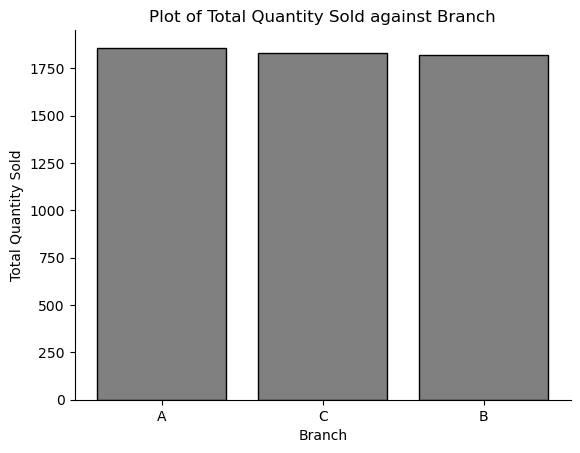

In [69]:
generate_bar_plot(branch_sales.index, branch_sales['Total Quantity Sold'], 'Branch', 'Total Quantity Sold')

Result:
The order of number of items solds across the 3 branches is Lagos > P.H > Abuja


In [71]:
plt.savefig('plot of Quantity against branch.png')

<Figure size 640x480 with 0 Axes>

2. Across the 3 branches, how much has been sold over time

In [101]:
sales_over_time = comb_df.set_index('DateTime').resample('ME').agg({'Total' : 'sum'})

In [80]:
sales_over_time['Month'] = sales_over_time.index

In [102]:
sales_over_time

,Total
DateTime,
2019-01-31,41865072.48
2019-02-28,34998974.64
2019-03-31,39403982.52


In [87]:
sales_over_time['Month'] = sales_over_time['Month'].astype('str')

In [90]:
sales_over_time

,Total,Month
DateTime,,
2019-01-31,41865072.48,2019-01-31
2019-02-28,34998974.64,2019-02-28
2019-03-31,39403982.52,2019-03-31


In [98]:
sales_over_time['Month'] = sales_over_time['Month'].replace({'2019-01-31' : 'January', '2019-02-28' : 'February', '2019-03-31' : 'March'})

In [99]:
sales_over_time

,Total,Month
DateTime,,
2019-01-31,41865072.48,January
2019-02-28,34998974.64,February
2019-03-31,39403982.52,March


C:\Users\aaginam\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aaginam\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


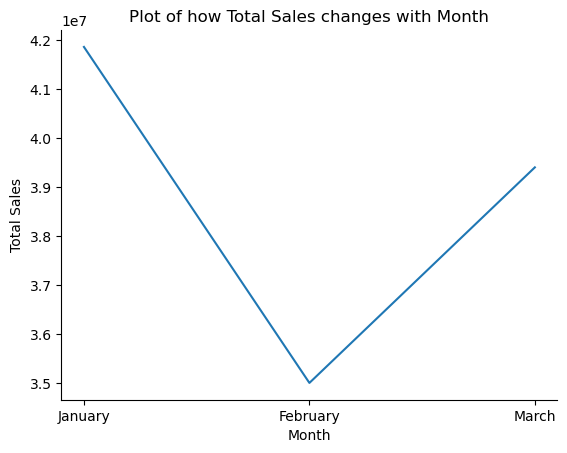

In [100]:
generate_line_plot(x='Month', y='Total', xlabel='Month', ylabel='Total Sales', data=sales_over_time)

Result : Across the 3 branches, the highest sales happened in January and decreased steadily in February then picked up in March

3. Rating Distribution across the 3 branches

In [106]:
rating_cat = (comb_df
              .groupby('Rating Category')
              .agg({'Rating Category': 'count'}))

rating_cat

,Rating Category
Rating Category,
High,329
Low,153
Medium,518


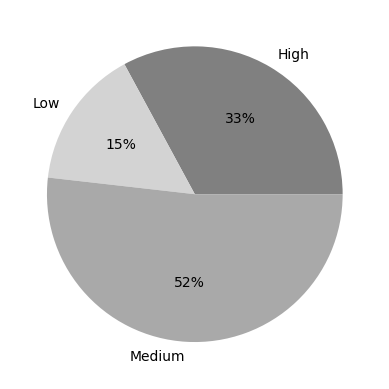

In [113]:
plot_pie(values=rating_cat['Rating Category'], labels=rating_cat.index,colors=['grey', 'lightgrey', 'darkgrey'])

Result: About 15% of our customers (150) rated our services as low.

In [115]:
comb_df['Month'] = comb_df['DateTime'].dt.month_name()

In [116]:
comb_df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment Type,cost of goods sold,gross margin percentage,gross income,Rating,DateTime,Rating Category,Month
0,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,Epay,188218.8,4.761905,9410.94,9.1,2019-01-05 13:08:00,High,January
1,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,Card,116751.6,4.761905,5837.58,7.4,2019-03-03 13:23:00,Medium,March
2,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,Epay,167673.6,4.761905,8383.68,8.4,2019-01-27 20:33:00,High,January
3,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,Epay,217501.2,4.761905,10875.06,5.3,2019-02-08 10:37:00,Medium,February
4,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,Epay,148694.4,4.761905,7434.72,5.8,2019-02-25 14:36:00,Medium,February


In [117]:
comb_df['Day'] = comb_df['DateTime'].dt.day_name()

In [118]:
comb_df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment Type,cost of goods sold,gross margin percentage,gross income,Rating,DateTime,Rating Category,Month,Day
0,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,Epay,188218.8,4.761905,9410.94,9.1,2019-01-05 13:08:00,High,January,Saturday
1,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,Card,116751.6,4.761905,5837.58,7.4,2019-03-03 13:23:00,Medium,March,Sunday
2,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,Epay,167673.6,4.761905,8383.68,8.4,2019-01-27 20:33:00,High,January,Sunday
3,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,Epay,217501.2,4.761905,10875.06,5.3,2019-02-08 10:37:00,Medium,February,Friday
4,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,Epay,148694.4,4.761905,7434.72,5.8,2019-02-25 14:36:00,Medium,February,Monday


#### Conclusion



#### Recommendations